In [5]:
# Part 1: Data Loading and Basic Exploration

# Import required libraries
import pandas as pd

# 1. Load the data
data = pd.read_csv(r"C:\Users\user\Downloads\metadata\metadata.csv")

# 2. Examine the first few rows
data.head()

# 3. Check DataFrame dimensions (rows, columns)
data.shape

# Info summary (data types + non-null counts)
data.info()

# Check missing values in important columns
important_columns = ['title', 'abstract', 'publish_time', 'journal']
data[important_columns].isnull().sum()

# Basic statistics for numerical columns (like s2_id, mag_id)
data.describe()

C:\Users\user\AppData\Local\Temp\ipykernel_8388\423676031.py:7: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\user\Downloads\metadata\metadata.csv")


,mag_id,s2_id
count,0.0,9.764680e+05
mean,NaN,2.175871e+08
std,NaN,5.312281e+07
min,NaN,9.600000e+01
25%,NaN,2.211411e+08
50%,NaN,2.320829e+08
75%,NaN,2.373948e+08
max,NaN,2.491936e+08


In [11]:
# Part 2: Data Cleaning and Preparation

# --- 1. Identify columns with many missing values ---
missing_values = data.isnull().sum().sort_values(ascending=False)
missing_values

# --- 2. Drop useless columns ---
# 'mag_id' is completely empty, so we drop it
data = data.drop(columns=['mag_id'])

# --- 3. Handle missing values ---
# drop rows missing publish_time, keep others

data = data.dropna(subset=['publish_time'])

# fill missing abstracts/journals with a placeholder
data['abstract'] = data['abstract'].fillna("No abstract available")
data['journal'] = data['journal'].fillna("Unknown Journal")
data['title'] = data['title'].fillna("Untitled")

# --- 4. Convert publish_time to datetime format ---
data['publish_time'] = pd.to_datetime(data['publish_time'], errors='coerce')

# Drop any rows where publish_time couldn’t be converted
data = data.dropna(subset=['publish_time'])

# --- 5. Extract year from publication date ---
data['year'] = data['publish_time'].dt.year

# --- 6. Create a new feature: abstract word count ---
data['abstract_word_count'] = data['abstract'].apply(lambda x: len(str(x).split()))

# --- 7. Check results ---
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 518871 entries, 0 to 1056659
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   cord_uid             518871 non-null  object        
 1   sha                  370365 non-null  object        
 2   source_x             518871 non-null  object        
 3   title                518871 non-null  object        
 4   doi                  501795 non-null  object        
 5   pmcid                385264 non-null  object        
 6   pubmed_id            413541 non-null  object        
 7   license              518871 non-null  object        
 8   abstract             518871 non-null  object        
 9   publish_time         518871 non-null  datetime64[ns]
 10  authors              503251 non-null  object        
 11  journal              518871 non-null  object        
 12  who_covidence_id     996 non-null     object        
 13  arxiv_id          

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id,year,abstract_word_count
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN,2001,262
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,2000,142
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,2000,219
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,2001,68
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN,2001,110


In [23]:
#saving cleaned csv file

data.to_csv(r"C:\Users\user\Downloads\metadata/cleaned_data.csv", index=False)

In [15]:
!pip install wordcloud

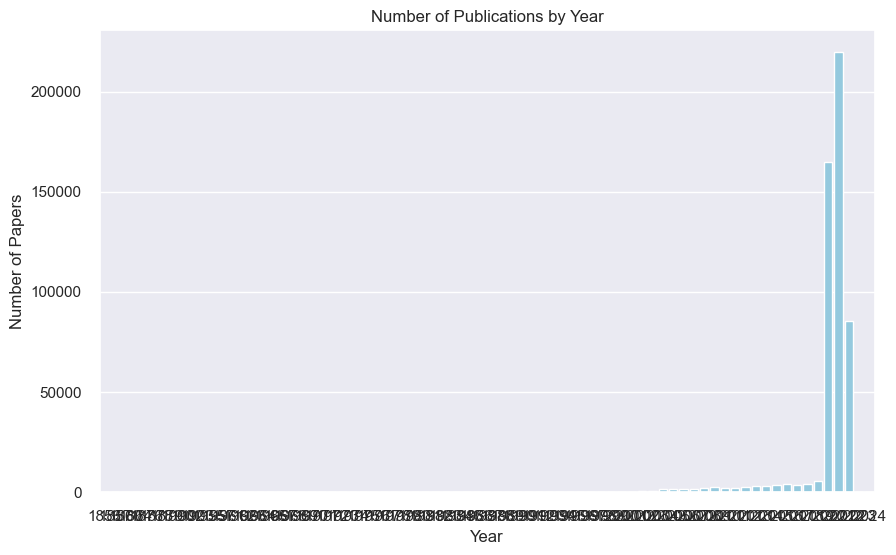

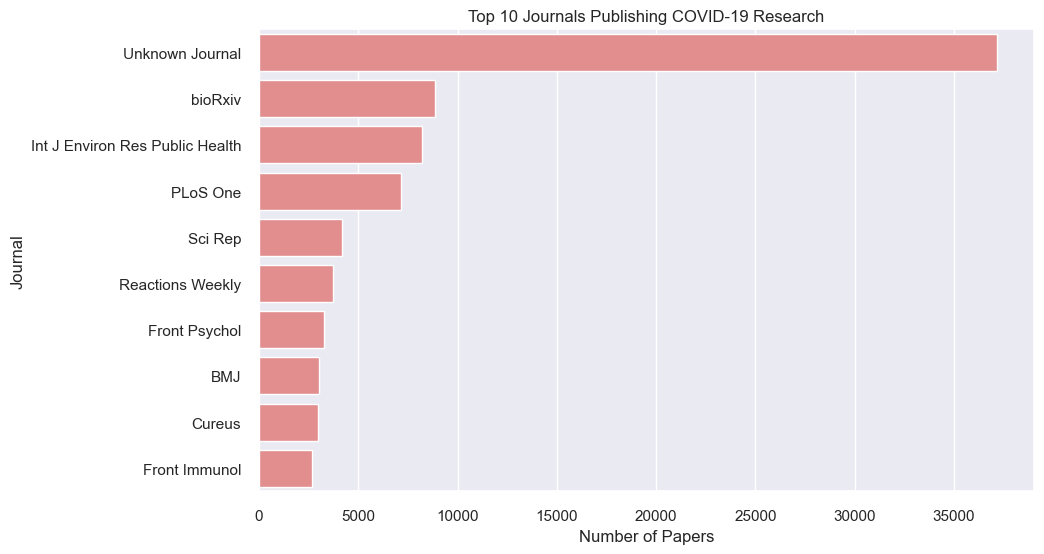

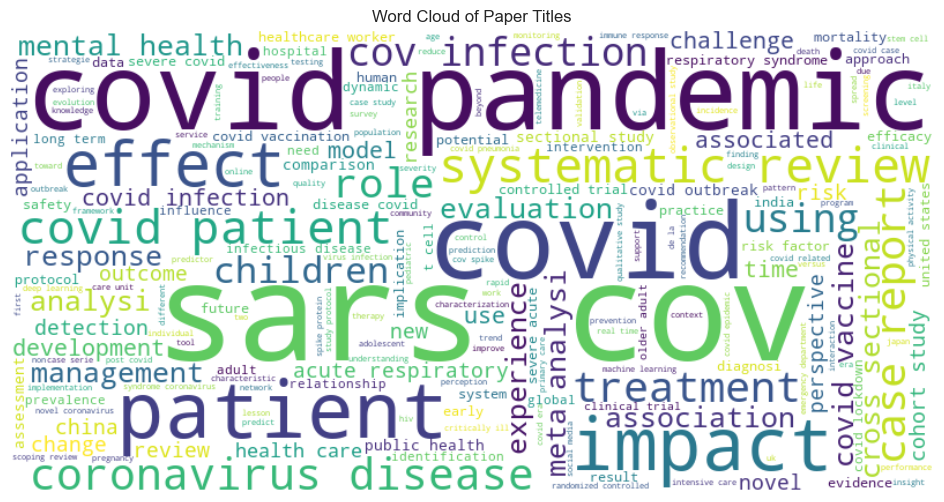

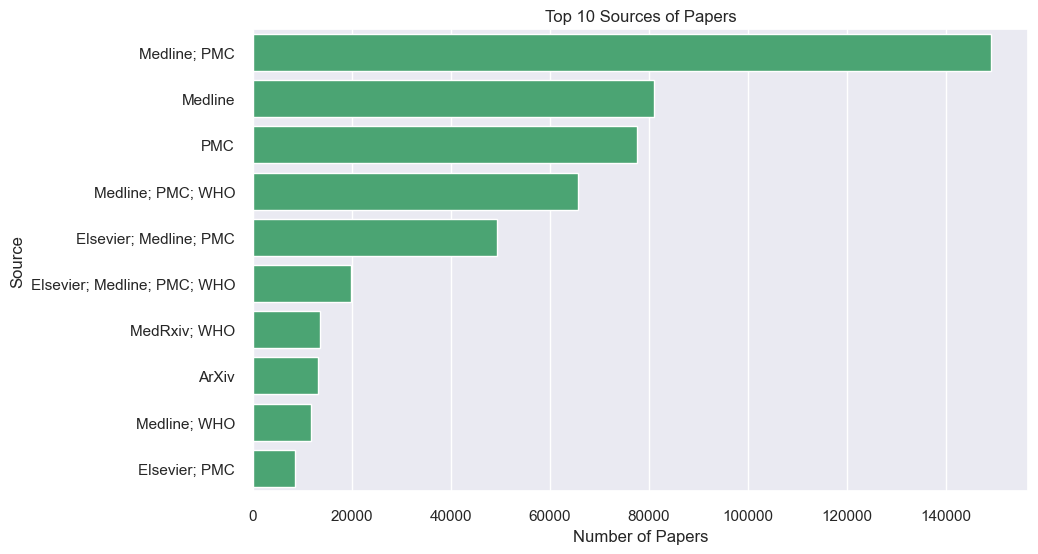

In [17]:
# Part 3: Data Analysis and Visualization

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter

# Ensure plots look nice
plt.style.use("seaborn-v0_8")
sns.set(rc={"figure.figsize": (10, 6)})

# --- 1. Count papers by publication year ---
year_counts = data['year'].value_counts().sort_index()
year_counts

# Visualization: Publications over time
plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, color="skyblue")
plt.title("Number of Publications by Year")
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.show()


# --- 2. Identify top journals ---
top_journals = data['journal'].value_counts().head(10)
top_journals

# Visualization: Top publishing journals
plt.figure(figsize=(10, 6))
sns.barplot(y=top_journals.index, x=top_journals.values, color="lightcoral")
plt.title("Top 10 Journals Publishing COVID-19 Research")
plt.xlabel("Number of Papers")
plt.ylabel("Journal")
plt.show()


# --- 3. Most frequent words in titles ---
# Simple word frequency (lowercase, split by spaces)
titles = data['title'].dropna().str.lower().str.cat(sep=" ")
words = [word for word in titles.split() if len(word) > 3]  # filter short words
word_freq = Counter(words).most_common(20)
word_freq


# --- 4. Word cloud of paper titles ---
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(titles)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Paper Titles")
plt.show()


# --- 5. Distribution of paper counts by source ---
source_counts = data['source_x'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(y=source_counts.index[:10], x=source_counts.values[:10], color="mediumseagreen")
plt.title("Top 10 Sources of Papers")
plt.xlabel("Number of Papers")
plt.ylabel("Source")
plt.show()

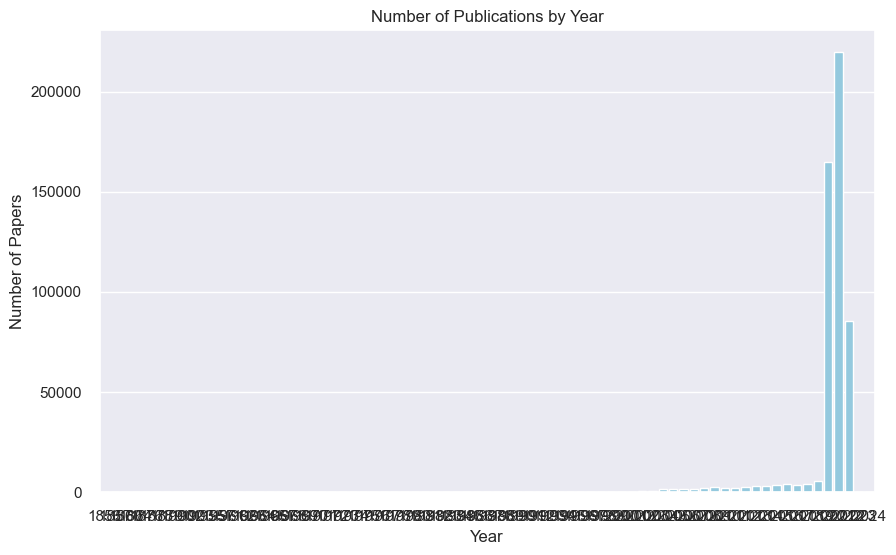

In [35]:
# --- 1. Count papers by publication year ---
year_counts = data['year'].value_counts().sort_index()
year_counts

# Visualization: Publications over time
plt.figure(figsize=(10, 6))
sns.barplot(x=year_counts.index, y=year_counts.values, color="skyblue")
plt.title("Number of Publications by Year")
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.show()

# Save the figure
save_path = r"C:\Users\user\Downloads\metadata\publications_plot.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')

<Figure size 1000x600 with 0 Axes>

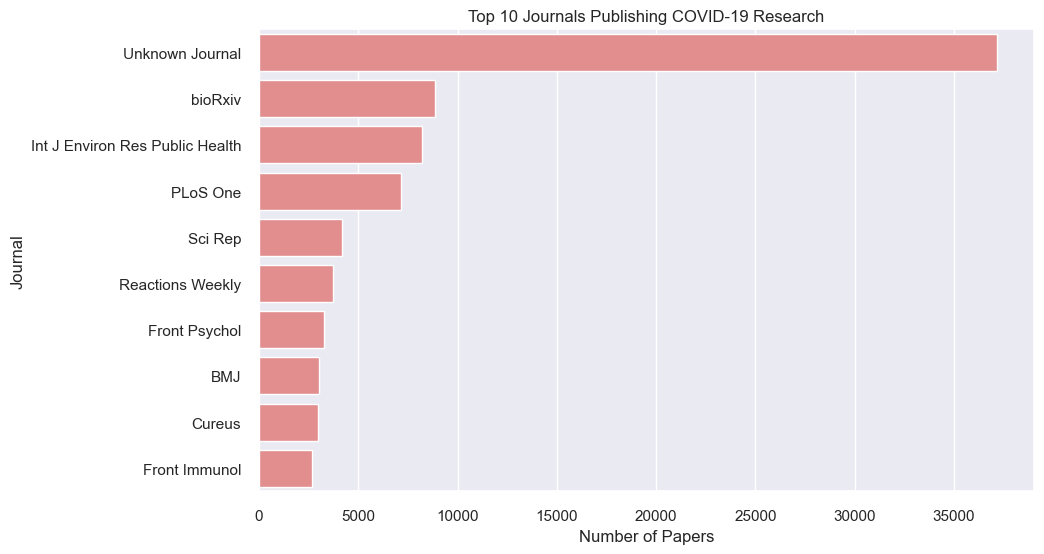

In [37]:
# --- 2. Identify top journals ---
top_journals = data['journal'].value_counts().head(10)
top_journals

# Visualization: Top publishing journals
plt.figure(figsize=(10, 6))
sns.barplot(y=top_journals.index, x=top_journals.values, color="lightcoral")
plt.title("Top 10 Journals Publishing COVID-19 Research")
plt.xlabel("Number of Papers")
plt.ylabel("Journal")
plt.show()

# Save the figure
save_path = r"C:\Users\user\Downloads\metadata\journals_plot.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')

<Figure size 1000x600 with 0 Axes>

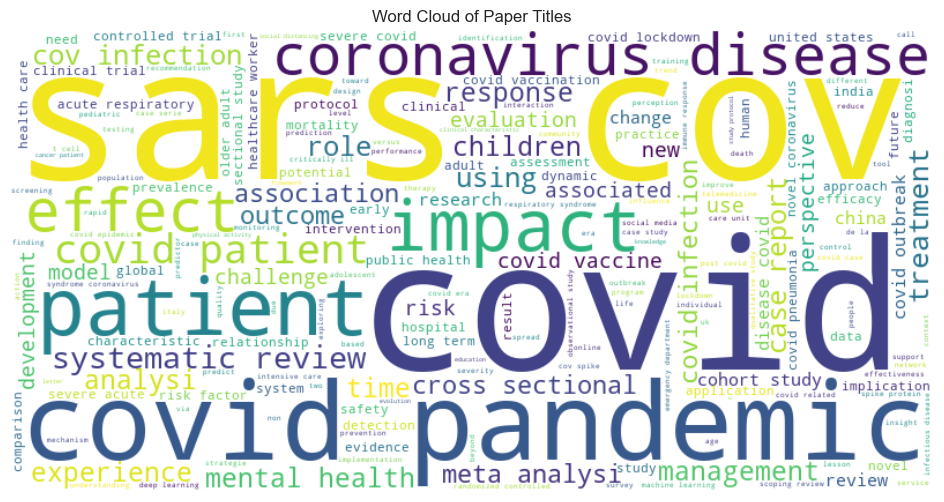

In [39]:
# --- 4. Word cloud of paper titles ---
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(titles)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Paper Titles")
plt.show()

# Save the figure
save_path = r"C:\Users\user\Downloads\metadata\word_plot.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')

<Figure size 1000x600 with 0 Axes>

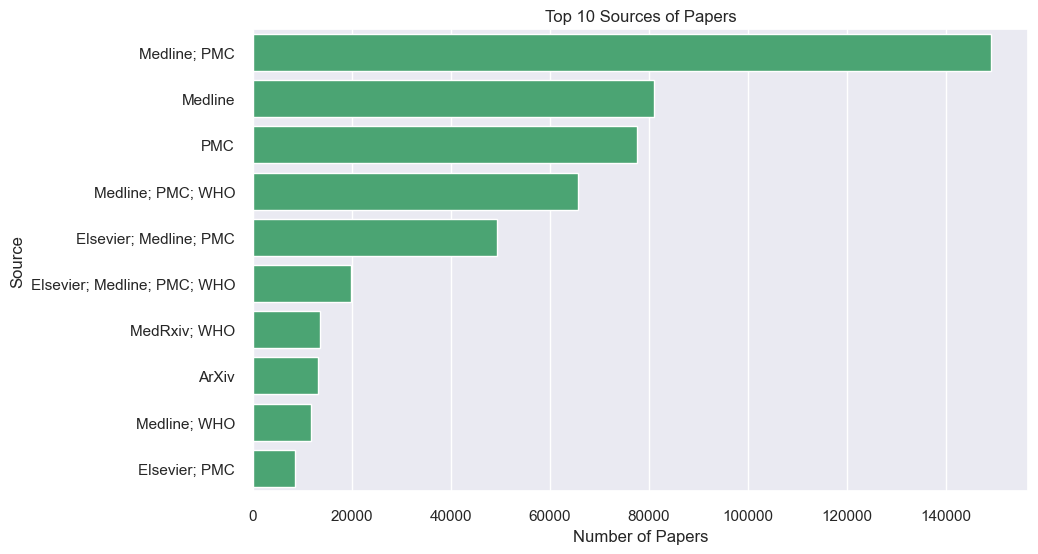

In [41]:
# --- 5. Distribution of paper counts by source ---
source_counts = data['source_x'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(y=source_counts.index[:10], x=source_counts.values[:10], color="mediumseagreen")
plt.title("Top 10 Sources of Papers")
plt.xlabel("Number of Papers")
plt.ylabel("Source")
plt.show()
# Save the figure
save_path = r"C:\Users\user\Downloads\metadata\count_plot.png"
plt.savefig(save_path, dpi=300, bbox_inches='tight')

C:\Users\user\AppData\Local\Temp\ipykernel_8388\1577416876.py:8: DtypeWarning: Columns (1,5,6,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  new_data = pd.read_csv(r"C:\Users\user\Downloads\metadata\cleaned_data.csv")
2025-09-26 23:52:26.655 
  command:

    streamlit run C:\Users\user\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-09-26 23:52:27.174 Serialization of dataframe to Arrow table was unsuccessful due to: ("Could not convert '32362507' with type str: tried to convert to double", 'Conversion failed for column pubmed_id with type object'). Applying automatic fixes for column types to make the dataframe Arrow-compatible.
2025-09-26 23:52:27.624 Session state does not function when running a script without `streamlit run`


DeltaGenerator()

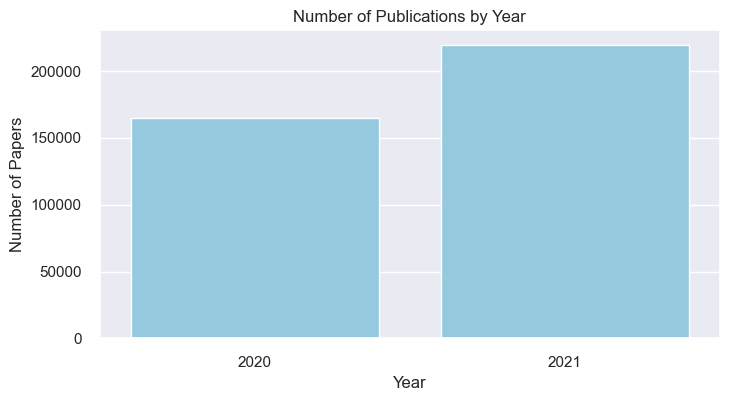

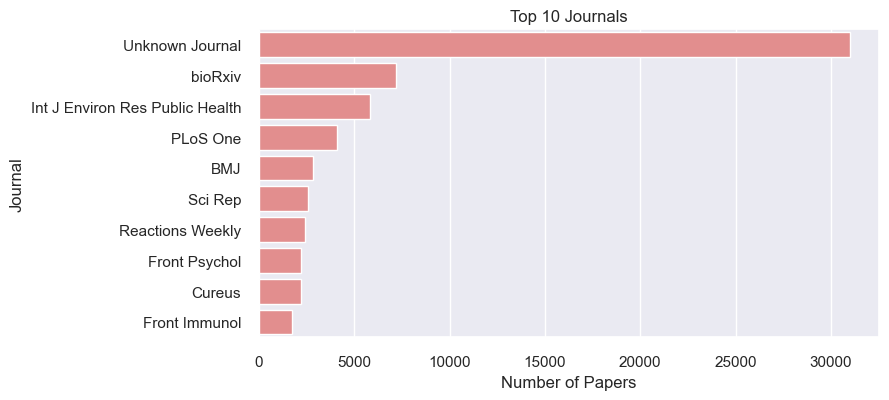

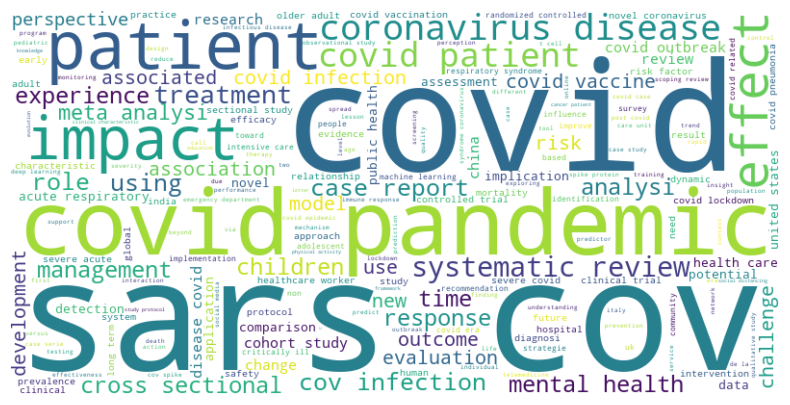

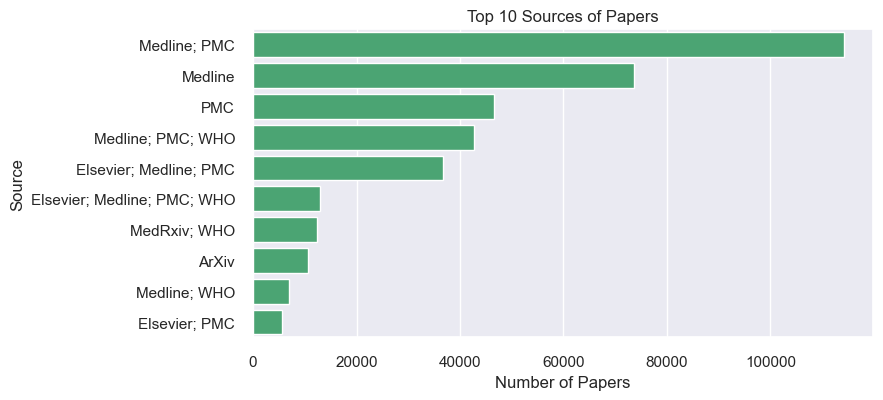

In [25]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# --- Load cleaned dataset ---
new_data = pd.read_csv(r"C:\Users\user\Downloads\metadata\cleaned_data.csv") 

# --- Page Layout ---
st.title("CORD-19 Data Explorer")
st.write("Simple exploration of COVID-19 research papers (CORD-19 metadata)")

# Show sample of the data
st.subheader("Sample of the Data")
st.write(new_data.sample(5))

# --- Sidebar filters ---
st.sidebar.header("Filters")

# Year range slider
min_year = int(new_data['year'].min())
max_year = int(new_data['year'].max())
year_range = st.sidebar.slider("Select year range", min_year, max_year, (2020, 2021))

# Journal dropdown
journals = new_data['journal'].value_counts().index.tolist()
selected_journal = st.sidebar.selectbox("Select a Journal", ["All"] + journals)

# Apply filters
filtered_data = new_data[(new_data['year'] >= year_range[0]) & (new_data['year'] <= year_range[1])]

if selected_journal != "All":
    filtered_data = filtered_data[filtered_data['journal'] == selected_journal]

# --- Visualization 1: Publications over time ---
st.subheader("Publications by Year")
year_counts = filtered_data['year'].value_counts().sort_index()

fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x=year_counts.index, y=year_counts.values, ax=ax, color="skyblue")
ax.set_title("Number of Publications by Year")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Papers")
st.pyplot(fig)

# --- Visualization 2: Top Journals ---
st.subheader("Top Journals")
top_journals = filtered_data['journal'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(y=top_journals.index, x=top_journals.values, ax=ax, color="lightcoral")
ax.set_title("Top 10 Journals")
ax.set_xlabel("Number of Papers")
ax.set_ylabel("Journal")
st.pyplot(fig)

# --- Visualization 3: Word Cloud of Titles ---
st.subheader("Word Cloud of Paper Titles")
titles = " ".join(filtered_data['title'].dropna().tolist()).lower()
if titles:
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(titles)
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.imshow(wordcloud, interpolation="bilinear")
    ax.axis("off")
    st.pyplot(fig)
else:
    st.write("No titles available for the selected filters.")

# --- Visualization 4: Distribution by Source ---
st.subheader("Distribution of Papers by Source")
source_counts = filtered_data['source_x'].value_counts().head(10)

fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(y=source_counts.index, x=source_counts.values, ax=ax, color="mediumseagreen")
ax.set_title("Top 10 Sources of Papers")
ax.set_xlabel("Number of Papers")
ax.set_ylabel("Source")
st.pyplot(fig)